# Google Top Stories - An exploration

This dataset was collected during the pandemic, it contains headlines shown by Google Search.

The dataset is organized by year, month, date, hour, in a series of nested folders. The leaf folders contain JSON files with information about top stories. 

Your goal is to write first Python function that takes the name of the folder "GoogleTopStories" and stores the content of all the JSON files into a single CSV file. Once you have a CSV file, you can practice your pandas & seaborn skills in analyzing the data.

Some tips and ideas for analysis:
1. Use the Python command `os.walk` to iteratively traverse the nested subfolders. Account for hidden files that start with .
2. Although the dataset has a column domain, imagine that it doesn't have it and write a function that takes a URL and extract the domain name from it and saves it in a colum. Use the .apply method to create the column. Learn how to parse URLs with urllib.parse.
3. Create a bar chart with the frequencies of the top 10 domains. (Use domains, since 'source name' contains duplicates.)
4. Create a heatmap that shows the distribution of domains across the 'story_position' values.
5. Create timeseries of unique articles per month by query type. (This is challenging.)

In [18]:
import os
import json
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:

for root, dirs, files in os.walk(".", topdown=True):
    for name in files:
        print (os.path.join(root, name))
    for name in dirs:
        print (os.path.join(root, name))

.\Exploring Google Top Stories.ipynb
.\.ipynb_checkpoints
.\GoogleTopStories
.\Intro Pandas
.\.ipynb_checkpoints\Exploring Google Top Stories-checkpoint.ipynb
.\GoogleTopStories\2020
.\GoogleTopStories\2021
.\GoogleTopStories\2020\04
.\GoogleTopStories\2020\05
.\GoogleTopStories\2020\06
.\GoogleTopStories\2020\07
.\GoogleTopStories\2020\08
.\GoogleTopStories\2020\09
.\GoogleTopStories\2020\10
.\GoogleTopStories\2020\11
.\GoogleTopStories\2020\12
.\GoogleTopStories\2020\04\25
.\GoogleTopStories\2020\04\26
.\GoogleTopStories\2020\04\27
.\GoogleTopStories\2020\04\28
.\GoogleTopStories\2020\04\29
.\GoogleTopStories\2020\04\30
.\GoogleTopStories\2020\04\25\10pm
.\GoogleTopStories\2020\04\25\10pm\coronavirus symptoms.json
.\GoogleTopStories\2020\04\25\10pm\coronavirus test.json
.\GoogleTopStories\2020\04\25\10pm\coronavirus.json
.\GoogleTopStories\2020\04\25\10pm\Covid-19.json
.\GoogleTopStories\2020\04\26\10am
.\GoogleTopStories\2020\04\26\10pm
.\GoogleTopStories\2020\04\26\10am\coronavirus

In [3]:
def load_json_files(start_path):
    json_data = []
    
    # traverse directory
    for root, dirs, files in os.walk(start_path):
        
        # filter hidden directories
        dirs[:] = [d for d in dirs if not d.startswith('.')]
        
        # filter hidden files
        files[:] = [f for f in files if not f.startswith('.')]
        
        for file in files:
            file_path = os.path.join(root, file)
            
            # read json content
            with open(file_path, 'r') as f:
                try:
                    data = json.load(f)
                    json_data += data
                except:
                    print(f"Error loading JSON file: {file_path}")
    return json_data

In [6]:

json_data = load_json_files("./GoogleTopStories")

with open("out.csv", 'w') as outfile:
    csvWriter = csv.DictWriter(outfile, 
                               fieldnames=['title', 'url', 'source', 'time', 'date', 'query', 'story_position', 'domain', 'category']) # get the key names as column names
    
    csvWriter.writeheader() # write the column names
    csvWriter.writerows(json_data) # write all rows

In [7]:
df = pd.DataFrame(json_data)
df.head()

,title,url,source,time,date,query,story_position,domain,category
0,Six new coronavirus symptoms just officially a...,https://www.miamiherald.com/news/coronavirus/a...,Miami Herald,1 day ago,2020-04-25 22:00:00,coronavirus symptoms,1,www.miamiherald.com,NaN
1,Coronavirus FAQs: Are There Lots Of Cases With...,https://www.npr.org/sections/goatsandsoda/2020...,NPR,1 day ago,2020-04-25 22:00:00,coronavirus symptoms,2,www.npr.org,NaN
2,CDC adds 6 new possible coronavirus symptoms,https://www.ktvq.com/news/coronavirus/cdc-adds...,KTVQ.com,2 hours ago,2020-04-25 22:00:00,coronavirus symptoms,3,www.ktvq.com,NaN
3,WHO says no evidence shows that having coronav...,https://www.cnn.com/2020/04/25/us/who-immunity...,CNN.com,6 hours ago,2020-04-25 22:00:00,coronavirus test,1,www.cnn.com,NaN
4,'No Evidence' Yet That Recovered COVID-19 Pati...,https://www.npr.org/sections/coronavirus-live-...,NPR,11 hours ago,2020-04-25 22:00:00,coronavirus test,2,www.npr.org,NaN


In [8]:
from urllib.parse import urlparse

oneurl = df.iloc[0]['url']

# get domain
urlparse(oneurl).netloc

# create copy of df to test
df_test = df.copy()
df_test.head()

get_domain = lambda url: urlparse(oneurl).netloc
df_test["domain2"] = df_test["url"].apply(get_domain)

df_test.head()

,title,url,source,time,date,query,story_position,domain,category,domain2
0,Six new coronavirus symptoms just officially a...,https://www.miamiherald.com/news/coronavirus/a...,Miami Herald,1 day ago,2020-04-25 22:00:00,coronavirus symptoms,1,www.miamiherald.com,NaN,www.miamiherald.com
1,Coronavirus FAQs: Are There Lots Of Cases With...,https://www.npr.org/sections/goatsandsoda/2020...,NPR,1 day ago,2020-04-25 22:00:00,coronavirus symptoms,2,www.npr.org,NaN,www.miamiherald.com
2,CDC adds 6 new possible coronavirus symptoms,https://www.ktvq.com/news/coronavirus/cdc-adds...,KTVQ.com,2 hours ago,2020-04-25 22:00:00,coronavirus symptoms,3,www.ktvq.com,NaN,www.miamiherald.com
3,WHO says no evidence shows that having coronav...,https://www.cnn.com/2020/04/25/us/who-immunity...,CNN.com,6 hours ago,2020-04-25 22:00:00,coronavirus test,1,www.cnn.com,NaN,www.miamiherald.com
4,'No Evidence' Yet That Recovered COVID-19 Pati...,https://www.npr.org/sections/coronavirus-live-...,NPR,11 hours ago,2020-04-25 22:00:00,coronavirus test,2,www.npr.org,NaN,www.miamiherald.com


0            www.miamiherald.com
1                    www.npr.org
2                   www.ktvq.com
3                    www.cnn.com
4                    www.npr.org
                  ...           
16940                www.npr.org
16941        www.bostonglobe.com
16942    www.businessinsider.com
16943              www.today.com
16944        bangordailynews.com
Name: domain, Length: 16945, dtype: object


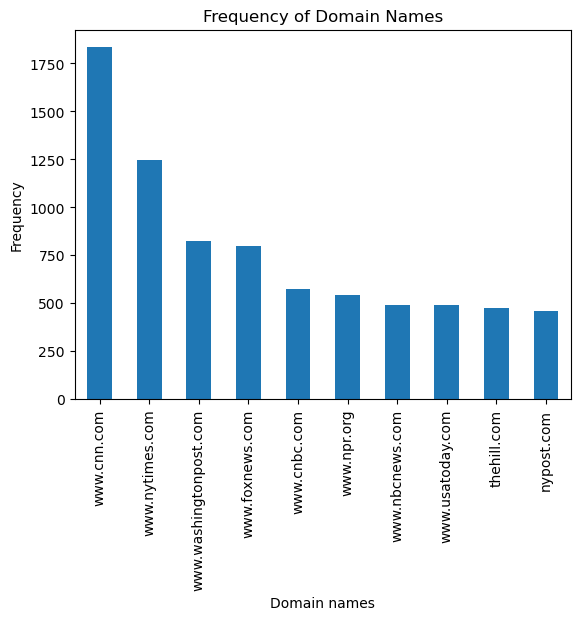

In [14]:

df["domain"].nunique()
print(df['domain'])
df['domain'].value_counts().nlargest(10).plot(kind='bar')
plt.xlabel('Domain names')
plt.ylabel('Frequency')
plt.title('Frequency of Domain Names')

plt.show()

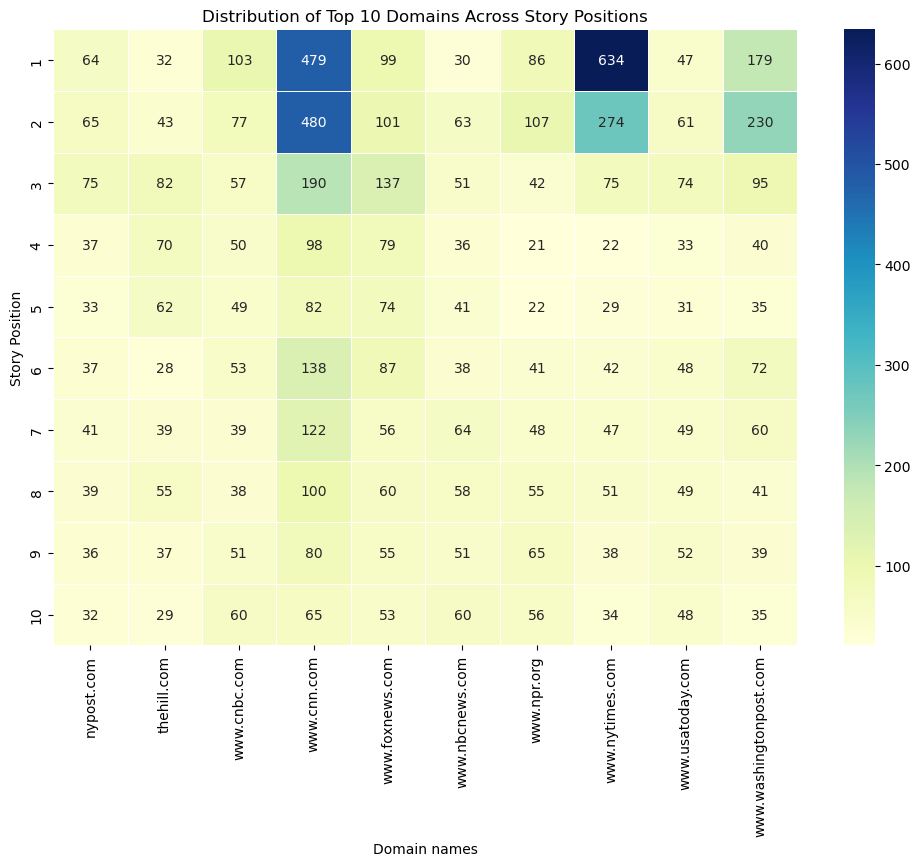

In [25]:
top_domains = df['domain'].value_counts().nlargest(10).index
filtered_df = df[df['domain'].isin(top_domains)]
heatmap_data = filtered_df.groupby(['story_position', 'domain']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d", linewidths=.5)
plt.xlabel('Domain names')
plt.ylabel('Story Position')
plt.title('Distribution of Top 10 Domains Across Story Positions')

plt.show()

Index(['title', 'url', 'source', 'time', 'date', 'query', 'story_position',
       'domain', 'category', 'month_year'],
      dtype='object')


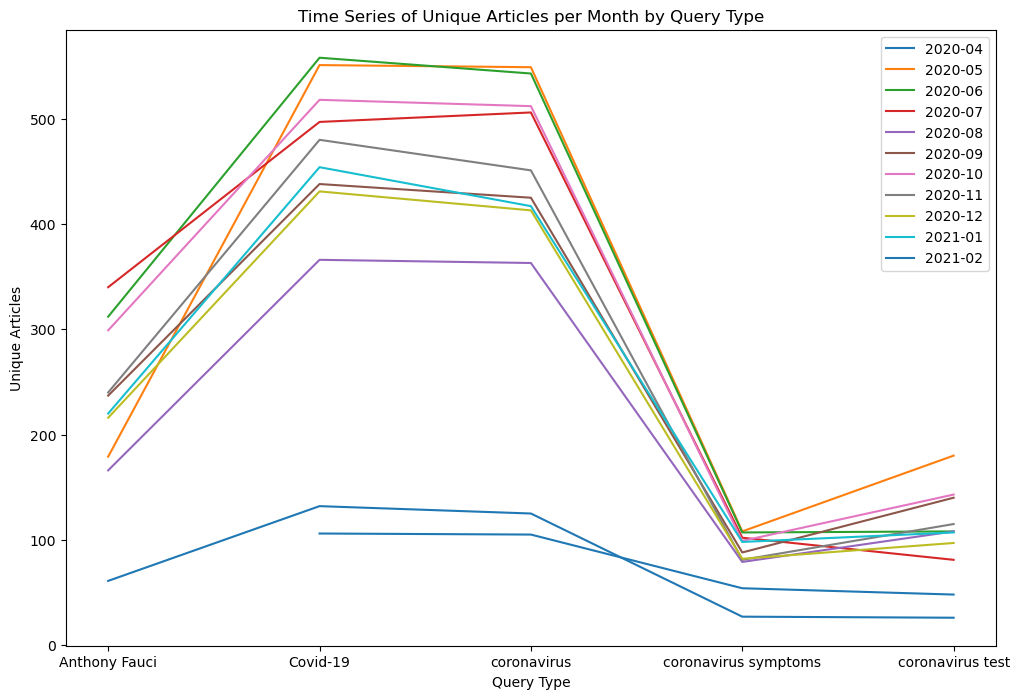

In [29]:
column_names = df.columns
print(column_names)

df['date'] = pd.to_datetime(df['date'])
df['month_year'] = df['date'].dt.to_period('M')

time_series_data = df.groupby(['query', 'month_year'])['title'].nunique().unstack()
plt.figure(figsize=(12, 8))

for query_type in time_series_data.columns:
    plt.plot(time_series_data.index, time_series_data[query_type], label=query_type)

plt.xlabel('Query Type')
plt.ylabel('Unique Articles')
plt.title('Time Series of Unique Articles per Month by Query Type')
plt.legend()
plt.show()